# mBuild Tutorial 07: Energy Minimization

Description

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

By this point you have likely noticed that the geometries of some of the molecules we've created may not look entirely realistic (e.g. all backbone atoms featuring 180 degree angles in our PEG molecule). You can solve this issue by placing `Particles` and `Ports` in more realistic locations, either manually or by using energy minimized inputs. 

Alternatively, you can construct a `Compound` and then energy minimize, either through a simulation engine or using the `energy_minimization` function in mBuild (which uses the [Open Babel](http://openbabel.org/dev-api/) toolkit) to yield more realistic geometries for your prototypes.

**Note:** In many cases it is easier to create systems with unrealistic configurations.

In [2]:
help(mb.Compound.energy_minimization)

Help on function energy_minimization in module mbuild.compound:

energy_minimization(self, steps=2500, algorithm='cg', forcefield='UFF')
    Perform an energy minimization on a Compound
    
    Utilizes Open Babel (http://openbabel.org/docs/dev/) to perform an
    energy minimization/geometry optimization on a Compound by applying
    a generic force field.
    
    This function is primarily intended to be used on smaller components,
    with sizes on the order of 10's to 100's of particles, as the energy
    minimization scales poorly with the number of particles.
    
    Parameters
    ----------
    steps : int, optionl, default=1000
        The number of optimization iterations
    algorithm : str, optional, default='cg'
        The energy minimization algorithm.  Valid options are 'steep',
        'cg', and 'md', corresponding to steepest descent, conjugate
        gradient, and equilibrium molecular dynamics respectively.
    forcefield : str, optional, default='UFF'
        T

<IPython.core.display.Javascript object>


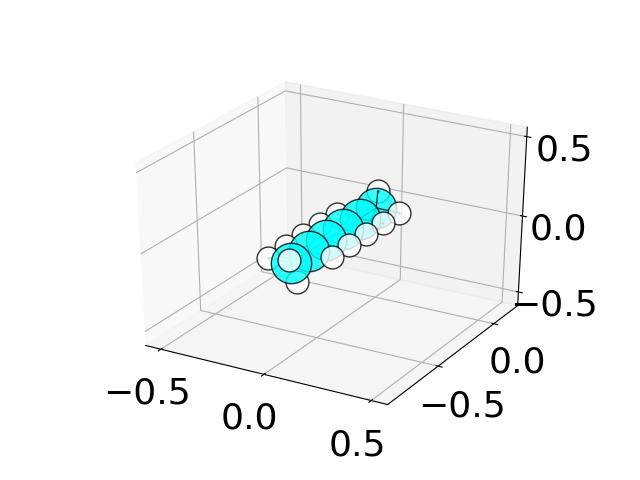

In [3]:
from mbuild.examples import Alkane
hexane = Alkane(6)
visualize(hexane)

/Users/summeraz/mbuild/mbuild/compound.py:1257: UserWarning: Performing energy minimization using the Open Babel package. Please refer to the documentation to find the appropriate citations for Open Babel and the UFF force field
  "Open Babel and the {} force field".format(forcefield))
/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


<IPython.core.display.Javascript object>


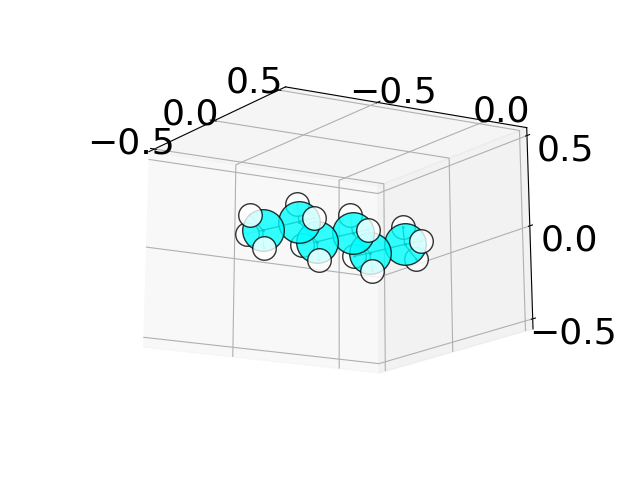

In [4]:
hexane.energy_minimization()
visualize(hexane)

/Users/summeraz/mbuild/mbuild/compound.py:1257: UserWarning: Performing energy minimization using the Open Babel package. Please refer to the documentation to find the appropriate citations for Open Babel and the GAFF force field
  "Open Babel and the {} force field".format(forcefield))
/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


<IPython.core.display.Javascript object>


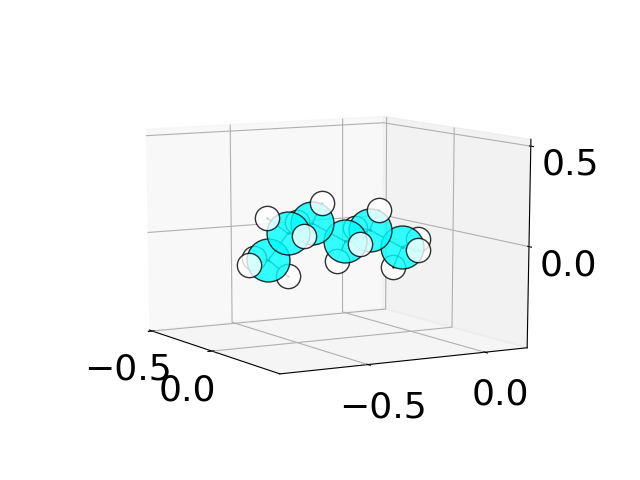

In [5]:
hexane = Alkane(6)
hexane.energy_minimization(steps=4000, algorithm='steep', forcefield='GAFF')
visualize(hexane)